In [ ]:
%cd /content/drive/MyDrive/대학/활동/아이펠/교과서/7장

/content/drive/MyDrive/대학/활동/아이펠/교과서/7장


In [ ]:
pwd

'/content/drive/MyDrive/대학/활동/아이펠/교과서/7장'

# Pg 245 Sequential 모델

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# 기본적인 Sequential 기법
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
# 점진적 Sequential 모델 만들기
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [ ]:
# 아직 모델을 build하지 않았기에 생기는 에러
# model.weights

In [ ]:
model.build(input_shape=(None, 3))

In [ ]:
model.weights

[<tf.Variable 'dense_17/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.01551893, -0.27784207,  0.11027923,  0.11238539, -0.00628221,
         -0.0211944 , -0.00858095,  0.01130563, -0.27584156,  0.27296925,
          0.2921018 , -0.2457682 , -0.28024706, -0.01794216, -0.00930101,
         -0.0401347 , -0.28171074,  0.0264321 , -0.00411305, -0.09281716,
         -0.0950305 ,  0.05315554, -0.07213682, -0.06669465,  0.25065446,
          0.02180749,  0.15126681,  0.14939716, -0.29123372,  0.11014459,
          0.18400773, -0.10062577, -0.28473195,  0.02140558,  0.06267822,
          0.12223604, -0.27893847, -0.2223407 , -0.17590374,  0.16215053,
         -0.11916213,  0.11903477, -0.28425416,  0.14327756,  0.05455431,
          0.20320141, -0.26371253,  0.14893654, -0.18333778, -0.08524419,
         -0.12138852,  0.18500817, -0.06076975,  0.23065239,  0.19431928,
          0.23511451,  0.11905918, -0.21153557,  0.17217356, -0.27032685,
          0.29791868,  0.12104234, -0.0181

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                256       
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# name 매개변수로 모델과 층에 이름 지정하기
model = keras.Sequential(name="my_model")
model.add(layers.Dense(64, activation="relu", name="hidden"))
model.add(layers.Dense(10, activation="softmax", name="output"))
model.build((None,3))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 64)                256       
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                256       
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# pg249 Functional API model

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_21 (Dense)            (None, 64)                256       
                                                                 
 dense_22 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 다중 입력, 다중 출력 함수형 모델
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

#something = layers.Concatenate()([title, text_body, tags])
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, 10000)]              0         []                            
                                                                                                  
 text_body (InputLayer)      [(None, 10000)]              0         []                            
                                                                                                  
 tags (InputLayer)           [(None, 100)]                0         []                            
                                                                                                  
 concatenate_7 (Concatenate  (None, 20100)                0         ['title[0][0]',               
 )                                                                   'text_body[0][0]',     

In [ ]:
# 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)


40/40 [==============================] - 0s 7ms/step


In [ ]:
# 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags" : tags_data},
          {"priority" : priority_data, "department": department_data})

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

40/40 [==============================] - 0s 8ms/step


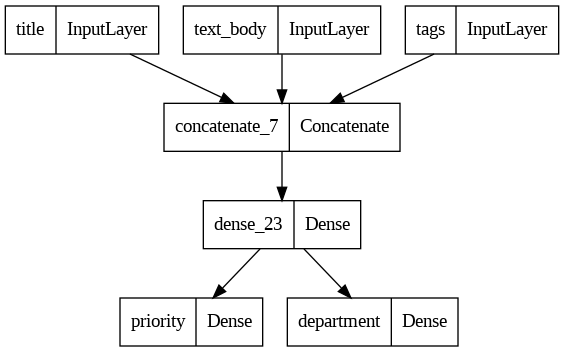

In [ ]:
keras.utils.plot_model(model, "ticket_classifier.png")

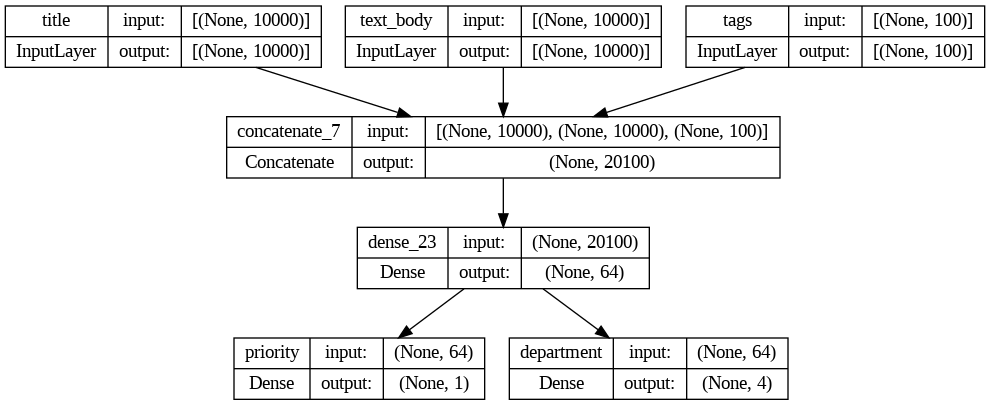

In [ ]:
keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True
)

In [ ]:
# 함수형 모델에 있는 층의 입력과 출력을 출력하기
model.layers

In [ ]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_7')>

In [ ]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(
    inputs = [title, text_body, tags],
    outputs = [priority, department, difficulty]
)

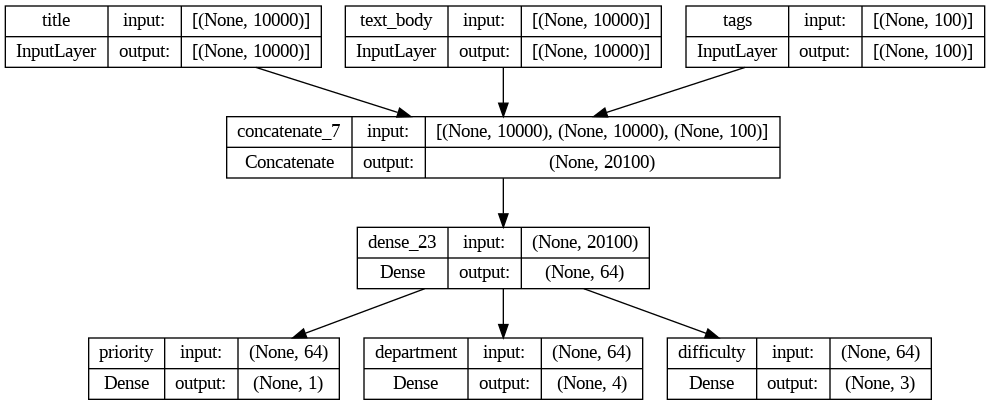

In [ ]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

# pg256 Subclassing model

In [ ]:
class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation="relu")
    self.priority_scorer = layers.Dense(1, activation="sigmoid")
    self.department_classifier = layers.Dense(
        num_departments, activation="softmax")

  def call(self, inputs):
    title = inputs["title"]
    text_body = inputs["text_body"]
    tags = inputs["tags"]
    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

In [ ]:
model = CustomerTicketModel(num_departments = 4)
priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

In [ ]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)

model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])



40/40 [==============================] - 1s 8ms/step - loss: 20.8186 - output_1_loss: 0.3295 - output_2_loss: 20.4891 - output_1_mean_absolute_error: 0.4945 - output_2_accuracy: 0.0664


[20.818607330322266,
 0.32952064275741577,
 20.489086151123047,
 0.49454745650291443,
 0.06640625]

In [ ]:
priority_preds, department_preds = model.predict({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data})

40/40 [==============================] - 1s 12ms/step


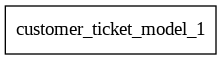

In [ ]:
keras.utils.plot_model(model, "subclassing_model.png", show_shapes=True)

In [ ]:
# 함수형 모델을 포함하는 서브클래싱 모델 만들기
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
  def __init__(self,num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64, activation="relu")
    self.classifier = binary_classifier

  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features)

model = MyModel()

In [ ]:
# 표준 워크플로: compile(), fit(), evaluate(), predict()
from tensorflow.keras.datasets import mnist

def get_mnist_model():
  inputs = keras.Input(shape=(28 * 28,))
  features = layers.Dense(512, activation="relu")(inputs)
  features = layers.Dropout(0.5)(features)
  outputs = layers.Dense(10, activation="softmax")(features)
  model = keras.Model(inputs, outputs)
  return model

In [ ]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000,28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data = (val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 18s 11ms/step - loss: 0.2935 - accuracy: 0.9125 - val_loss: 0.1513 - val_accuracy: 0.9563
Epoch 2/3
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1620 - accuracy: 0.9529 - val_loss: 0.1182 - val_accuracy: 0.9662
Epoch 3/3
313/313 [==============================] - 1s 4ms/step


# 사용자 정의 지표를 만드는 모델

In [74]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [75]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 23s 13ms/step - loss: 0.2964 - accuracy: 0.9116 - rmse: 7.1767 - val_loss: 0.1438 - val_accuracy: 0.9584 - val_rmse: 7.3555
Epoch 2/3
1563/1563 [==============================] - 28s 18ms/step - loss: 0.1601 - accuracy: 0.9538 - rmse: 7.3509 - val_loss: 0.1188 - val_accuracy: 0.9672 - val_rmse: 7.3985
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.0949 - accuracy: 0.9736 - rmse: 7.4340


# 콜백 사용하기

In [76]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.h5",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.2985 - accuracy: 0.9116 - val_loss: 0.1400 - val_accuracy: 0.9612
Epoch 2/10
   8/1563 [..............................] - ETA: 12s - loss: 0.2334 - accuracy: 0.9336

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 17s 11ms/step - loss: 0.1595 - accuracy: 0.9539 - val_loss: 0.1135 - val_accuracy: 0.9688
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1294 - accuracy: 0.9635 - val_loss: 0.1066 - val_accuracy: 0.9710
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1144 - accuracy: 0.9685 - val_loss: 0.0981 - val_accuracy: 0.9748
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0997 - accuracy: 0.9721 - val_loss: 0.0976 - val_accuracy: 0.9751
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0931 - accuracy: 0.9744 - val_loss: 0.0889 - val_accuracy: 0.9786
Epoch 7/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.0863 - accuracy: 0.9765 - val_loss: 0.0906 - val_accuracy: 0.9794
Epoch 8/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.0828 - accuracy: 0.9781 - val_loss: 0.0916 - val_accura

In [77]:
model = keras.models.load_model("checkpoint_path.h5")

# 사용자 정의 콜백 만들기

In [78]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.2939 - accuracy: 0.9121 - val_loss: 0.1497 - val_accuracy: 0.9572
Epoch 2/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.1594 - accuracy: 0.9542

# 텐서보드를 사용한 모니터링과 시각화

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tb_logs",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

# 다른 팀 발표 내용

여러 팀별로 접근하는 방식들이 모두 다양해서 갖가지 접근법이 있는것으로 보임
기존 교제에서 볼 수 있듯이 모든 과정들을 최대한 과적합 시키는 방법을 진행하는걸 볼 수 있었는데 특히 눈여겨 보였던 팀은 각 뉴런의 층들의 깊이를 최대 사이즈 최대 뉴런으로 배치를 시킨 후 활성화되는 뉴런들을 추적해서 효율적인 학습 방법으로 접근했었던 팀이었습니다.

# 회고

에폭을 무한정으로 올리기만 해서 로스가 오히려 올라가는 과접합 현상이 크게 관찰되지 않아 아쉬웠음

매 트레인마다 실험 결과값들이 변동되는 점들이 보여 모든 환경값들을 같은 상황에서 테스트 하지 못한다는 점들이 아쉬웠음

# 정리

학습이 멈추는 에폭은 학습률 & 모델의 복잡도 등 여러 요인들에 의해 기하급수적으로 바뀌어서 매번 다른 학습률을 지정하여 여러 환경마다 테스트 해보는 것이 필요로 해보임